In [1]:
income<-read.csv("../input/adult.csv")
income<-na.omit(income)
str(income)

'data.frame':	32561 obs. of  15 variables:
 $ age           : int  90 82 66 54 41 34 38 74 68 41 ...
 $ workclass     : Factor w/ 9 levels "?","Federal-gov",..: 1 5 1 5 5 5 5 8 2 5 ...
 $ fnlwgt        : int  77053 132870 186061 140359 264663 216864 150601 88638 422013 70037 ...
 $ education     : Factor w/ 16 levels "10th","11th",..: 12 12 16 6 16 12 1 11 12 16 ...
 $ education.num : int  9 9 10 4 10 9 6 16 9 10 ...
 $ marital.status: Factor w/ 7 levels "Divorced","Married-AF-spouse",..: 7 7 7 1 6 1 6 5 1 5 ...
 $ occupation    : Factor w/ 15 levels "?","Adm-clerical",..: 1 5 1 8 11 9 2 11 11 4 ...
 $ relationship  : Factor w/ 6 levels "Husband","Not-in-family",..: 2 2 5 5 4 5 5 3 2 5 ...
 $ race          : Factor w/ 5 levels "Amer-Indian-Eskimo",..: 5 5 3 5 5 5 5 5 5 5 ...
 $ sex           : Factor w/ 2 levels "Female","Male": 1 1 1 1 1 1 2 1 1 2 ...
 $ capital.gain  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ capital.loss  : int  4356 4356 4356 3900 3900 3770 3770 3683 3683 3004 ...
 $ hours.

In [2]:
library(caret)
library(rpart)
library(rpart.plot)

set.seed(1)
index<- createDataPartition(income$income, p=0.8, list=F)
Train<- income[index,]
Test<- income[-index,]

Loading required package: lattice
Loading required package: ggplot2


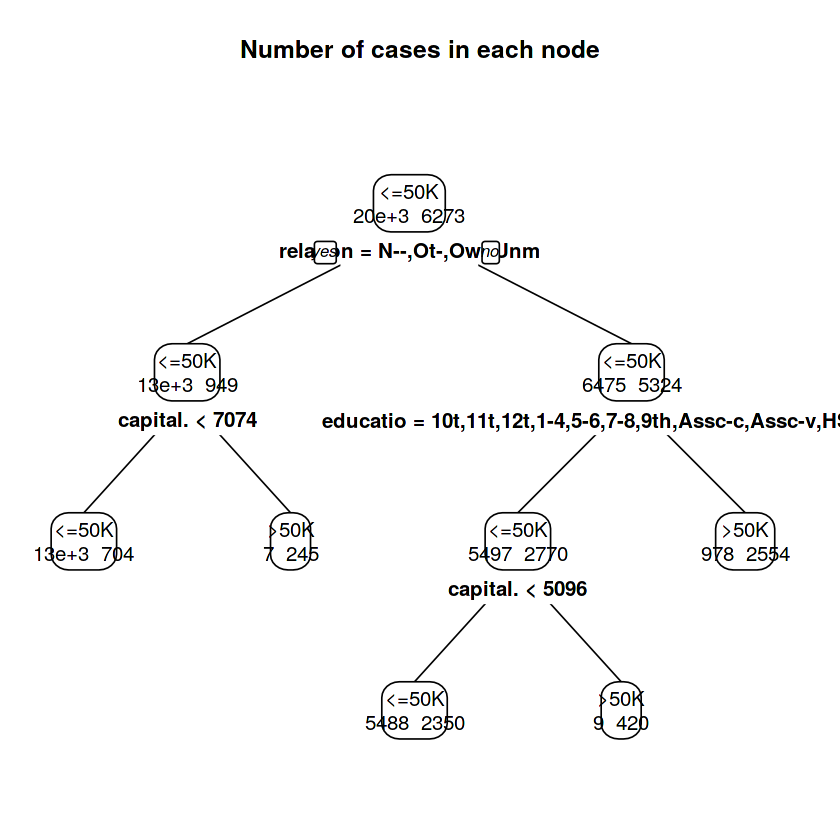

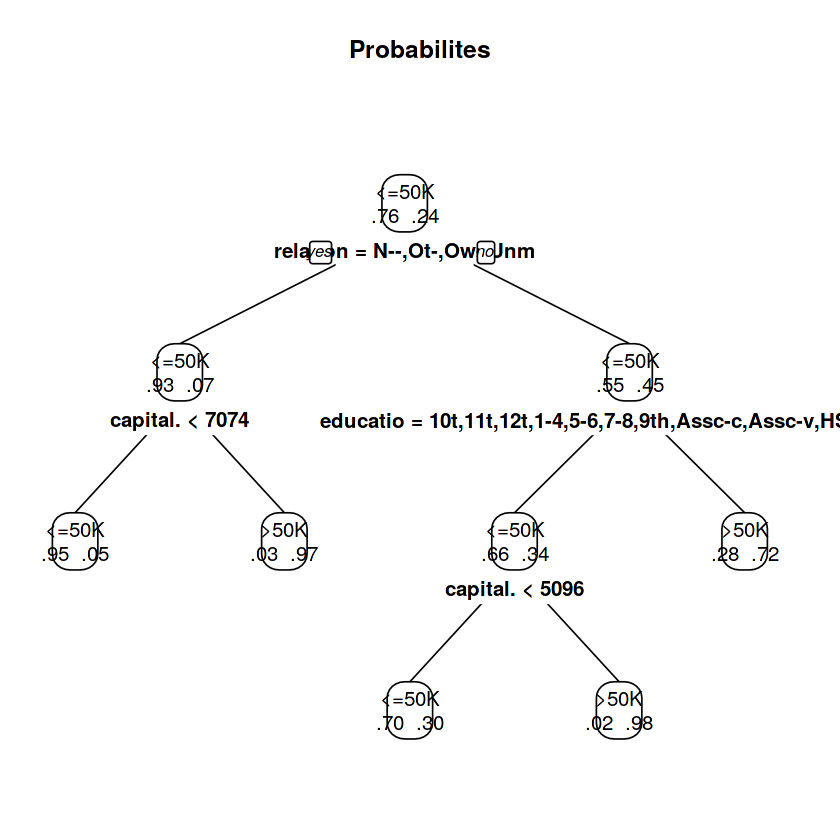

In [3]:
model<- rpart(income~., data=Train)
prp(model, type = 2, extra = 1, main = "Number of cases in each node")
prp(model, type = 2, extra = 4, main = "Probabilites")

In [4]:
library(rattle)
asRules (model)
#Rule 13- The predicted class is >50K, there are 429 cases in the terminal node covering 2% of the data. The probability of >50K is 0.98 meaning that 98% of incomes were predicted to be >50K.
#Rule 4- The predicted class is <=50K, there are 13998 cases in the terminal node covering 54% of the data. The probability of income being <=50K is 0.95 meaning that 95% of incomes were predicted to be <=50K.

Rattle: A free graphical interface for data science with R.
Version 5.2.0 Copyright (c) 2006-2018 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.



 Rule number: 13 [income=>50K cover=429 (2%) prob=0.98]
   relationship=Husband,Wife
   education=10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,HS-grad,Preschool,Some-college
   capital.gain>=5096

 Rule number: 5 [income=>50K cover=252 (1%) prob=0.97]
   relationship=Not-in-family,Other-relative,Own-child,Unmarried
   capital.gain>=7074

 Rule number: 7 [income=>50K cover=3532 (14%) prob=0.72]
   relationship=Husband,Wife
   education=Bachelors,Doctorate,Masters,Prof-school

 Rule number: 12 [income=<=50K cover=7838 (30%) prob=0.30]
   relationship=Husband,Wife
   education=10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,HS-grad,Preschool,Some-college
   capital.gain< 5096

 Rule number: 4 [income=<=50K cover=13998 (54%) prob=0.05]
   relationship=Not-in-family,Other-relative,Own-child,Unmarried
   capital.gain< 7074



In [5]:
pred_class<- predict(model, Test, type = "class")
pred_class[1:20]
confusionMatrix(pred_class, Test$income)
#The decision tree model is quite good since the accuracy is 84.41% and it is more than NIR (0.7592).
#Sensitivity is 0.94.88 meaning that the model could find 94.88% of all predicted incomes that are >50K.
#Specificity is 0.5140 meaning that the model could find 51.40% of all predicted incomes that are <=50K.
#PPV is 0.8603, which means that out of all >50K income predictions 86.03% were true.
#NPV is 0.7611, which means that out of all <=50K income predictions 76.11% were true. Overall, we can consider this model to be a good one.

1     6     7    12    14    19    20    23    32    34    46    47    52 
<=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K 
   55    58    61    73    76    77    84 
<=50K <=50K <=50K  >50K  >50K <=50K <=50K 
Levels: <=50K >50K

Confusion Matrix and Statistics

          Reference
Prediction <=50K >50K
     <=50K  4691  762
     >50K    253  806
                                          
               Accuracy : 0.8441          
                 95% CI : (0.8351, 0.8529)
    No Information Rate : 0.7592          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5206          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9488          
            Specificity : 0.5140          
         Pos Pred Value : 0.8603          
         Neg Pred Value : 0.7611          
             Prevalence : 0.7592          
         Detection Rate : 0.7204          
   Detection Prevalence : 0.8374          
      Balanced Accuracy : 0.7314          
                                          
       'Positive' Class : <=50K           
                                          

,<=50K,>50K
1,0.9497071,0.0502929
6,0.9497071,0.0502929
7,0.9497071,0.0502929
12,0.9497071,0.0502929
14,0.9497071,0.0502929
19,0.9497071,0.0502929
20,0.9497071,0.0502929
23,0.9497071,0.0502929
32,0.9497071,0.0502929
34,0.9497071,0.0502929


Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



[[1]]
[1] 0.8457819

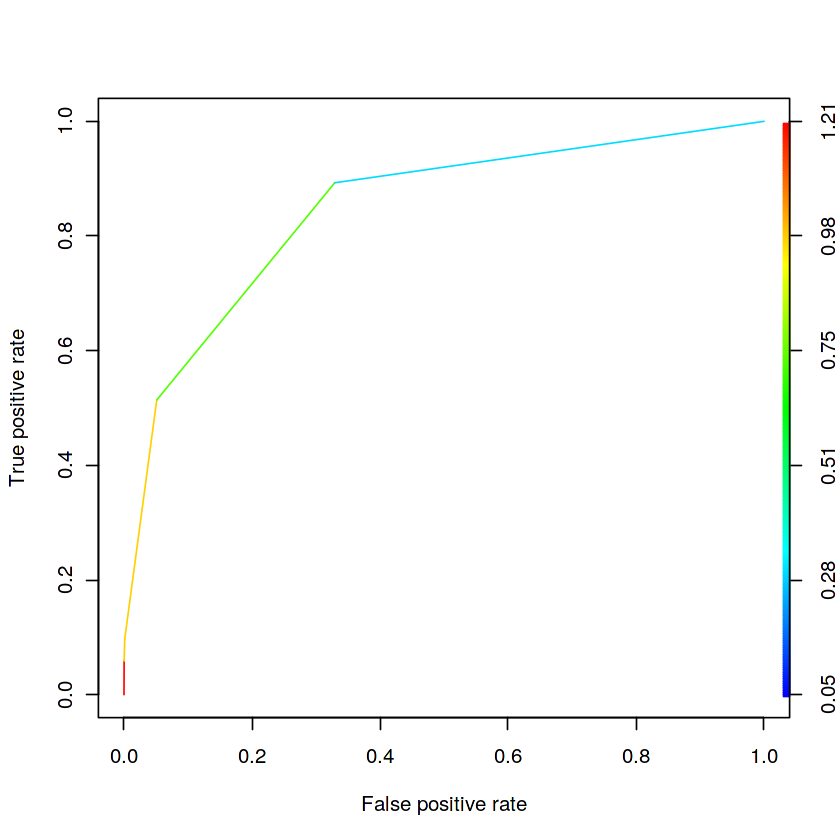

In [6]:
pred_prob<- predict(model, Test)
pred_prob[1:10,]

library("ROCR")
P_Test<- prediction(pred_prob[,2], Test$income)
perf<- performance(P_Test, "tpr", "fpr")
plot(perf, colorize = TRUE)
performance(P_Test, "auc")@y.values

#The area under the curve is 0.84578 which is a good indicator.